<img src='http://arch.ut.ac.ir/documents/70819125/2017cca1-b036-41de-bcce-f7376699275b' alt="UT logo" width="120" height="120" align="left">

<h1 align=center><font size=5> <b><i>Machine Learning(Fall 2020)</b><br>Task 3</i></font></h1>

#### In this notebook we want to become more familiar with data visualization and classify data with Logistic Regression.

# Section 1: MNIST Dataset
You can find information about the dataset and download it from [here](https://www.kaggle.com/oddrationale/mnist-in-csv)(please download train dataset).


## Visualize Dataset
Define functions for each purpose:
1. plot a digit

<img src="images/digit.png" width="50" height="50">

2. plot a series of instances of each class

<img src="images/digits.png" width="300" height="300">
3. Plot a shifted digit

<img src="images/shift.png" width="300" height="70">

### Section 1.1: Plot a Digit

In [44]:
#download dataset
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

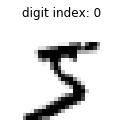

In [45]:
#plot digit
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2,2))
ax.set_axis_off()
sample_index = 0
ax.imshow(X[sample_index].reshape((28,28)), cmap=plt.cm.gray_r)
ax.set_title('digit index: ' + str(sample_index));

# Section 1.2: Plot a Series of Instances

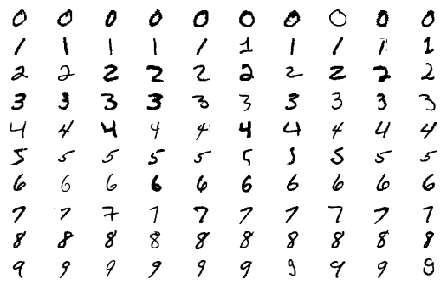

In [46]:
fig, axes = plt.subplots(10, 10, figsize=(8,5))

for i in range(10):
    samples = X[y==str(i)][:10]
    for j in range(10):
        axes[i][j].set_axis_off()
        axes[i][j].imshow(samples[j].reshape((28,28)), cmap=plt.cm.gray_r)


### Section 1.3: Plot a Shifted Digit

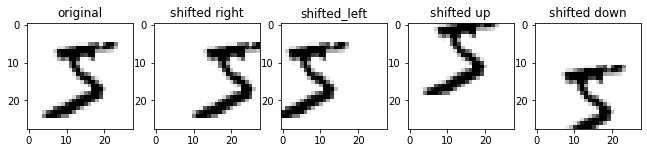

In [47]:
#plot digit
from scipy.ndimage import shift

fig, axes = plt.subplots(1,5,figsize=(11,8))
axes = axes.flatten()

offset = 6

shifts = [[0,0], [0,offset], [0,-offset], [-offset,0], [offset,0]]
titles = ['original', 'shifted right', 'shifted_left', 'shifted up', 'shifted down']

for i in range(5):
    shifted_image = shift(X[0].reshape(28,28), shifts[i])
    axes[i].imshow(shifted_image, cmap=plt.cm.gray_r)
    axes[i].set_title(titles[i]);

## Classification
In this part, you should do a binary classification to predict if a digit is '4' or not. report the requests listed below:
1. Plot Confusion Matrix and ROC
2. Report Accuracy, Sensitivity, Specificity, Precision and Recall.
3. Plot Recall vs Precision for different thresholds (using sklearn.metrics.precision_recall_curve) like the figures below:

<img src="images/rec_vs_pre1 .png" width="300" height="100">
<img src="images/rec_vs_pre2 .png" width="320" height="300">


#### Binaryizing the target for w.r.t number 4:

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import numpy as np

TARGET_CLASS = 4

y_binary = label_binarize(y, classes=np.unique(y))[:,TARGET_CLASS]
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

#### Training a Logistic Regression Classifier:

In [71]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log', max_iter = 1000, random_state=42)
clf.fit(X_train, y_train)

SGDClassifier(loss='log', random_state=42)

## Reporting The Confusion Matrix and  Metrics:

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

def report_results(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    print('################################################')
    print('accuracy = ', round(clf.score(X_test, y_test) * 100, 1), '%')
    print('################################################')
    print(classification_report(y_test, y_pred))
    print('################################################')
    disp = plot_confusion_matrix(clf, X_test, y_test, values_format = '.5g')
    disp.figure_.suptitle("Confusion Matrix")
    print("Confusion matrix:\n%s" % disp.confusion_matrix)

################################################
accuracy =  97.8 %
################################################
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12705
           1       0.92      0.84      0.88      1295

    accuracy                           0.98     14000
   macro avg       0.95      0.92      0.93     14000
weighted avg       0.98      0.98      0.98     14000

################################################
Confusion matrix:
[[12606    99]
 [  209  1086]]


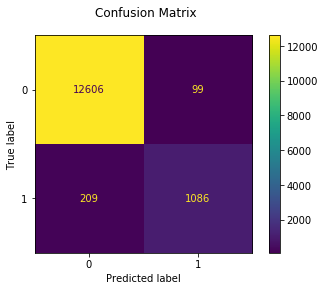

In [68]:
report_results(clf, X_test, y_test)

## Plotting ROC:

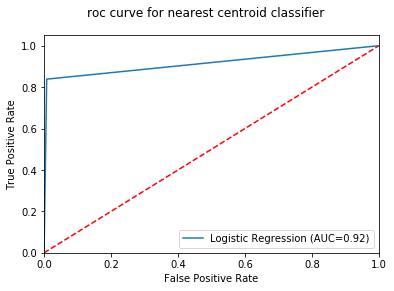

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
def plot_roc(clf):    
    y_pred = clf.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.plot(fpr, tpr, label='Logistic Regression (AUC={})'.format(round(roc_auc, 2)))
    plt.suptitle('roc curve for nearest centroid classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right");

plot_roc(clf)

## Plotting Precision vs Recall:

/home/amin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


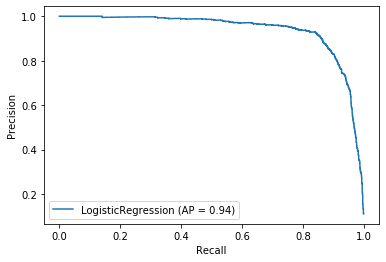

In [82]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
clf_reg = LogisticRegression(max_iter=8)
clf_reg.fit(X_train, y_train)
plot_precision_recall_curve(clf_reg, X_test, y_test);

## Plotting Precision-Recall w.r.t threshold:

In [11]:
from sklearn.model_selection import cross_val_predict

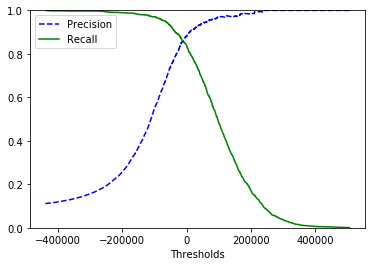

In [12]:
y_scores = cross_val_predict(clf, X_test, y_test, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
 
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Thresholds')
    plt.legend(loc='upper left')
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds);

# Section 2: Titanic Dataset

You can find information about the dataset and download it from [here](https://www.kaggle.com/c/titanic/data)(please download train dataset).


In [13]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt

In [14]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Cleaning Dataset
Do some process and answer to questions below:

1. Which columns have missing values?
2. How do you fill the missing values, and why do you use this approach?

### 1. Which columns have missing values?
### Ans:
#### As we can see the columns 'Age', 'Cabin' and 'Embarked' have missing values.

In [16]:
missing_percentage = 100 * (1 - round(titanic_data.count()/len(titanic_data), 4))
missing_percentage

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

### 2. How do you fill the missing values, and why do you use this approach?
### Ans:
#### I drop the 'Cabin' column because most of it's values are missing and it won't be informative. For 'Age' columns I will fill the missing values by the mean of the all ages because it is numerical and mean will be a proper estimation. I will fill the missing values of 'Embarked' column with the 'mode'(max frequent value) of that column because It is a categorical column and mode will be a good estimation.

In [17]:
titanic_data.drop(columns=['Cabin'], inplace=True)
titanic_data.loc[:, 'Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data.loc[:, 'Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [18]:
missing_percentage = 100 * (1 - round(titanic_data.count()/len(titanic_data), 3))
missing_percentage

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

#### As we can see now, all missing values have been handled.

## Exploratory Data Analysis

Answer to these questions by plot relating figures:

1. Compare the age distribution for survivors and the deceased. Do you see any interesting points?
2. Compare the fare distribution for survivors and the deceased. Look at the features' description on Kaggle, is there any other feature that seems to be highly correlated to fare? Explain it.
3. Plot the survivors based on the embarked port. What do you see? Do you have any hypothesis? 
4. Plot data based on traveling alone and with family (you may need to merge 2 columns of data somehow).
5. Which gender was more likely to survive? Do you know why?

## Plotting Age distribution of survived column:

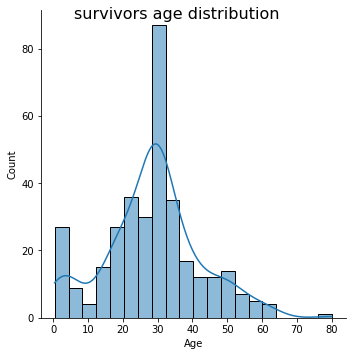

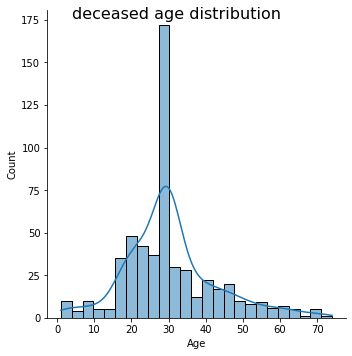

In [19]:
survivors = titanic_data[titanic_data['Survived'] == 1]
deceaseds = titanic_data[titanic_data['Survived'] == 0]

sns.displot(x='Age', data=survivors, kde=True).fig.suptitle('survivors age distribution', fontsize=16)
sns.displot(x='Age', data=deceaseds, kde=True).fig.suptitle('deceased age distribution', fontsize=16);

We can see the children between under 5 years old have survived more because the are disembarked before others. For other ages the distibutions are similar. Also we can see that most of the population of the ship was around 30 years old.

## Plotting Fare distribution of survived column:

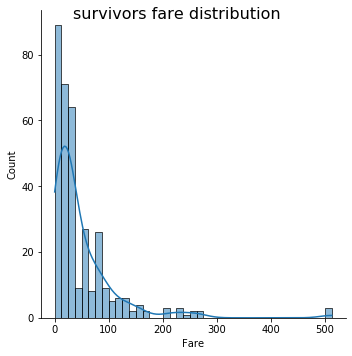

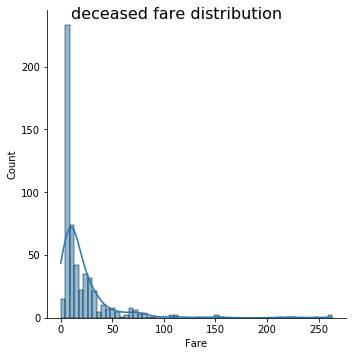

In [20]:
survivors = titanic_data[titanic_data['Survived'] == 1]
deceaseds = titanic_data[titanic_data['Survived'] == 0]

sns.displot(x='Fare', data=survivors, kde=True).fig.suptitle('survivors fare distribution', fontsize=16)
sns.displot(x='Fare', data=deceaseds, kde=True).fig.suptitle('deceased fare distribution', fontsize=16);

The plots for survivors and deceaseds are roughly similar and do not differ much.

## Making the Sex and Embarked column numeric to find correleations:

In [21]:
titanic_data.loc[:, 'Sex'] = titanic_data['Sex'].replace(['male','female'],[0,1])
titanic_data.loc[:, 'Embarked'] = titanic_data['Embarked'].replace(['S','C','Q'],[0,1,2])

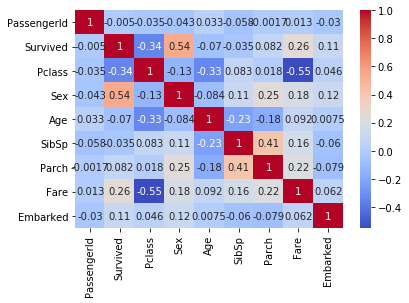

In [22]:
sns.heatmap(titanic_data.corr(), cmap="coolwarm", annot = True)
plt.show()

### As we can see, in addition to "Fare", the "Sex" , "Pclass" , "Embarked" features are high correleated with "Survived"

## Plotting Survivors based on embark port:

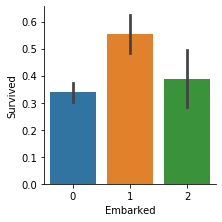

In [23]:
sns.catplot(x="Embarked", y ="Survived", data=titanic_data, kind="bar", height=3)
plt.show()

#### We can see that second port(Port C) has more survivors

## Plotting Survivors based on travelling alone or with family:

In [24]:
titanic_data.loc[:, 'WithFamily'] = (titanic_data['SibSp'] + titanic_data['Parch']) == 0

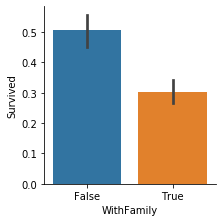

In [25]:
sns.catplot(x="WithFamily", y ="Survived", data=titanic_data, kind="bar", height=3);

### Plotting the survived column based on 'Sex':

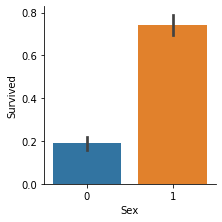

In [26]:
# 1 is for females
# 0 is for males
sns.catplot(x="Sex", y ="Survived", data=titanic_data, kind="bar", height=3);

## Females have survived more maybe because they have disembarked before males.

## Classification
in this part, you should do a binary classification to predict if a passenger survives or not. report the requests listed below:
1. Plot Confusion Matrix and ROC
2. Report Accuracy, Sensitivity, Specificity, Precision, and Recall.
-------------------------------------------------------------------------------------------------------------------------------
* Like the explanation notebook, do the necessary preprocess transformation on the dataset and report what you have done.  You get a bonus mark if you use dimension reduction techniques.

## Dimension Reduction:
### We remove the features that are not helpful for classification. Here "Name" and "Ticket" are not useful and also because we saw in the previous parts that "PassengerId",  "Age",  "SibSp", "Parch" have low correlation to the target column so we drop them:

In [27]:
non_usefull = ['Name', 'Ticket']
low_corr = ['PassengerId', 'Age', 'SibSp', 'Parch']
titanic_data.drop(columns=non_usefull + low_corr, inplace = True)

## One-Hot encoding of categorical columns:

In [28]:
titanic_data.loc[:, 'WithFamily'] = titanic_data.loc[:, 'WithFamily'].astype(int)

In [29]:
titanic_data = pd.get_dummies(titanic_data, columns=['Pclass', 'Embarked'])

In [30]:
X = titanic_data.iloc[:, 2:-1]
y = titanic_data['Survived']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression

## Training a logistic regression classifier:

In [33]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
print("Accuracy= ", clf.score(X_test,y_test))

Accuracy=  0.7150837988826816


# Accuracy is 71%

### Plotting ROC, confusion matrix and metrics:

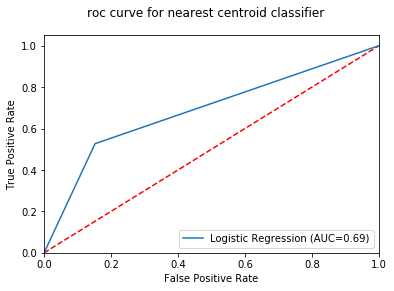

In [34]:
y_pred = clf.predict(X_test)
plot_roc(clf)

################################################
accuracy =  71.5 %
################################################
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       105
           1       0.71      0.53      0.60        74

    accuracy                           0.72       179
   macro avg       0.71      0.69      0.69       179
weighted avg       0.71      0.72      0.71       179

################################################
Confusion matrix:
[[89 16]
 [35 39]]


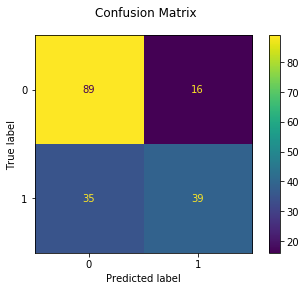

In [35]:
report_results(clf, X_test, y_test)